In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [1]:
import sys

In [4]:
print('\n'.join(sys.path))

/home/mark/Documents/teaching/aap/creating_whatif
/home/mark/anaconda3/envs/aap/lib/python39.zip
/home/mark/anaconda3/envs/aap/lib/python3.9
/home/mark/anaconda3/envs/aap/lib/python3.9/lib-dynload

/home/mark/anaconda3/envs/aap/lib/python3.9/site-packages
/home/mark/anaconda3/envs/aap/lib/python3.9/site-packages/IPython/extensions
/home/mark/.ipython


https://packaging.python.org/overview/


https://www.bernat.tech/pep-517-and-python-packaging/

* very readable intro to this complex topic
* very good high level diagrams of the packaging process

https://docs.python-guide.org/writing/structure/ - Hitchhikers Guide

https://blog.ionelmc.ro/2014/05/25/python-packaging/#the-structure

https://packaging.python.org/tutorials/packaging-projects/

https://packaging.python.org/guides/distributing-packages-using-setuptools/#working-in-development-mode


https://realpython.com/python-application-layouts/

https://github.com/yngvem/python-project-structure/

https://www.martinalarcon.org/2018-12-31-a-reproducible-science/ - includes stuff on cookiecutter-datascience, Luigi for workflow, Docker. It's a great example of an approach to reproducible Python work.

src/ or not to src/

https://github.com/pypa/packaging.python.org/issues/320
https://github.com/pypa/packaging.python.org/issues/320#issuecomment-495990983

Starting to think that cookiecutter-datascience is the right approach for package development projects like whatif. 

* uses src/ layout which seems to be gaining favor
* seems simpler than the MOLSSI cms version. That one does a non src/ layout.
* very simple setup.py file
     - need to understand the `name='src'` line
     - docs mention that can do editable pip installs and maybe this is related to that
     - requirements.txt vs requires=[] in setup.py?
* is from drivendata and thus has a very nice datasciencey layout
* good documentation at a level suitable for data science folks who are learning to create better software

https://drivendata.github.io/cookiecutter-data-science/

    cookiecutter https://github.com/drivendata/cookiecutter-data-science

## Excel "What if?" analysis with Python - Part 4: Project management and packaging


In the first three parts of this series, we've developed some Python approaches to typical Excel "what if?" analyses. This whole series is aimed at those who might have a strong Excel based background, a basic familiarity with Python programming and a desire to increase their Python knowledge.

* [Part 1: Models and Data Tables](http://hselab.org/excel-to-python-1-models-datatables.html)
* [Part 2: Goal Seek](http://hselab.org/excel-to-python-2-goalseek.html)
* [Part 3: Monte-carlo simulation](http://hselab.org/excel-to-python-3-simulation.html)

Along the way we explored some slightly more advanced Python topics (for relative newcomers to Python) such as:

* List comprehensions,
* Basic OO programming, creating our own classes and using things like `setattr` and `getattr`,
* Leveraging scikit-learn's `ParameterGrid` class,
* Faceted plots using Seaborn and matplotlib,
* Tuple unpacking, zip, and itertools,
* Safely copying objects,
* Root finding with, and without, `scipy.optimize`,
* Partial function freezing and lambda functions,
* Using `numpy.random` to generate random variates from various probability distributions,
* Using `scipy.stats` to compute probabilities and percentiles,
* Importing our `data_table`, `goal_seek` and `simulate` functions from a module.


Now that we've got a critical mass of "proof of concept" code, let's figure out how to structure our project and create a deployable package. In addition, let's rethink our OO design and add some much needed documentation to the code.

### Python packaging basics

What is a Python module? What is a Python package? A simple way to think about it is that a module is a Python file containing programs and a package is a folder containing Python program files and perhaps subfolders that also contain Python program files (yes, there are many more details). 



There are tools for turning such a folder into something that can be uploaded to places like PyPi or conda-forge (if you've used R, think CRAN) and installed by package managers like pip or conda.

**TODO** Diagram of a simple package

If you are new to the world of Python modules and packages, a great place to start is the tutorial done by the folks at Real Python - [Python Modules and Packages - An Introduction](https://realpython.com/python-modules-packages/). After going through the tutorial you'll have some familiarity with concepts needed in our tutorial:

* Python modules and how Python finds modules on your system,
* the different ways of importing modules,
* exploring the contents of modules,
* executing modules as scripts and reloading modules,
* Python packages, the __init__.py file, importing from packages, and subpackages.

Another good high level introduction to modules, packages and project structure is [The Hitchhikers Guide to Python: Structuring Your Project](https://docs.python-guide.org/writing/structure/). Of course, one should also visit the official [Python Packaging User Guide](https://packaging.python.org/) (start with the [Overview](https://packaging.python.org/overview/)), especially with the ever evolving nature of this topic. 

With a basic and limited understanding of Python packages, let's get to turning `whatif.py` into a package. What could possibly go wrong?


## Creating a simple Python project structure

So far, we've taken a pretty typical approach to exploring and developing our what if tools:

* use Jupyter notebooks to quickly try things out,
* single folder for the project,
* tried to use good filenames,
* when we started moving code out of notebooks and into *whatif.py*, we put the script in the same folder as the notebook (makes it easy to do an `import whatif`).

Many data analysis projects start in a similar way. In those, we usually at least would have a separate `data` folder. In terms of documentation, there are some scattered code comments and a README file with some notes to myself.

I manually created the following really simple folder structure.

    whatif
    ├── data
    ├── whatif
        ├── what_if_1_model_datatable.ipynb
        ├── what_if_2_goalseek.ipynb
        ├── what_if_3_simulation.ipynb
        └── whatif.py
    ├── README.md

Notice that for now, I've included the notebooks right in the main source code folder as opposed to in a notebooks folder. I'm doing that to put off some complexities around:

* importing code while you are still developing it,
* creating Python packages (for those who know about packaging, I've left out the `__init__.py` file for the same reasons).

However, as the project has grown and we now want to turn `whatif.py` into a reusable Python package, we need to rethink the organization of the project. In particular,

* the current structure is not what's needed for creating Python packages,
* we should have real documentation,
* the source code should be separate from example notebooks,
* we want a structure that facilitates efficient workflows and reproducible analysis and development.

We want a project structure that doesn't result in the all too common scenario of us going back to this project in six months and wondering what to make of the haphazard pile of files and folders we've created.

Analytics or data science type projects are often a blend of analysis and software development. This parallels the situation that many scientists find themselves. Organizations such as [Software Carpentry](https://software-carpentry.org/) have arisen to address the growing need for scientists/analysts to be better software developers. They have developed very high quality introductory tutorials on numerous [scientific programming related topics](https://software-carpentry.org/lessons/) such as the basics of R/Python programming, version control, bash shell use, and reproducible scientific analysis.

### So, how do you structure a Python project?

There are no shortage of opinions on this question and there's no one right answer. As the Python packaging ecosystem has evolved over time, so has the way one can and/or should structure Python projects. In addition, different types of projects (e.g. single installable library package vs a web app) might call for [different types of project layouts](https://realpython.com/python-application-layouts/).

### Enter, the Cookiecutter

Arising from this need to have a simple way to quickly create good project structures for different types of projects was the [Cookiecutter](https://cookiecutter.readthedocs.io/en/1.7.2/). From the docs:

> A command-line utility that creates projects from cookiecutters (project templates), e.g. creating a Python package project from a Python package project template.

In a nutshell, from a simple json configuration file and an example folder and file structure, the cookiecutter program asks us a few questions and then generates a skeleton project structure (set of folders and files). It does this by using [Jinja2 templates](https://jinja.palletsprojects.com/en/2.11.x/). Here's what a simple *cookiecutter.json* file might look like:

    {
        "project_name": "project name",
        "repo_name": "{{ cookiecutter.project_name }}",
        "author_name": "Your name (or your organization/company/team)",
        "description": "A short description of the project.",
        "open_source_license": ["MIT", "BSD-3-Clause", "No license file"],
    }

The key values are the cookiecutter attributes that you want to define and the values are the default values and/or options. The `{{ SOMETHING }}` are the templates. Notice that the default value for `repo_name` is just the project name you entered. These templates are then used throughout the specific cookiecutter's example folder structure and cookiecutter program is just doing a big Search and Replace and filling in templates with their values. That's it. Simple but very powerful.

Different types of Python people created different cookiecutters (i.e. templates) designed for their type of projects and their workflow and tool preferences. The most relevant for our purposes is the [Cookiecutter Data Science project](https://drivendata.github.io/cookiecutter-data-science/)



https://education.molssi.org/python-package-best-practices/




We'll revisit the project structure later after we have made some improvements to our **whatif.py** module.

## Version control

Initialized as a git repo 

```
git init
git add .
git commit -m 'initial commit'
```
and created remote repo at Github.



```
git remote add origin https://github.com/misken/whatif.git
git branch -M main
git push -u origin main
```

https://github.com/misken/whatif

## Source code editing
For now, we are going to edit *whatif.py* with a good text editor. In Linux, I use Geany as it has some nice features for programming including syntax highlighting, setting indent to spaces, code folding, a visual code structure tree, and many more. Do a search for "linux best code editors" and you can find additional options for editors. If you want to spend some time on a long time point of contention, check out the [vim vs emacs](https://linuxhint.com/vim_vs_emacs/) debate. But to really even appreciate that debate, you should have [some familiarity with *vi*](https://www.ele.uri.edu/faculty/vetter/Other-stuff/vi/vi-intro.pdf), the precursor to *vim*. It's a whole different world that using a modern text editor. I used *vi* in grad school (decades ago), but any knowledge I had is long gone. Seriously, don't do this; just grab Geany or Atom (any platform) or Sublime Text or Notepad++ (Windows) or some other decent text editor.

Later, we'll use the PyCharm (or Spyder) IDE, but for now, a good text editor is more than sufficient.

## The whatif.py module - initial design
After completing Part 3 of this series, we had an example model class, `BookstoreModel`, and three functions that took such a model as one of the arguments and one utility function that was used to extract a Pandas `DataFrame` from the simulationoutput object (a list of dictionaries).

* `data_table` - a generalized version of Excel's Data Table tool,
* `goal_seek` - very similar in purpose to Excel's Goal Seek tool,
* `simulate` - basic Monte-Carlo simulation capabilities,
* `get_sim_results_df` - converts output of `simulate` to a pandas dataframe.

All of these were copied and pasted from their respective Jupyter notebooks and consolidated in the *whatif.py* file. This module can be imported and its functions used. While this is workable, let's try to generalize things a bit and improve the design. 

## Creating a `Model` base class

Everything we've done so far has used the one specific model class we created - `BookstoreModel`. In order to create a new model, we'd probably copy the code from this class and make the changes specific to the new model in terms of its variables (class attributes) and formulas (class methods). However, every model class (as we've conceived it so far) also needs to have an `update` method that takes a dictionary of model variable names (the keys) and their new values. Rather than the modeler having to remember to do this, it makes more sense to create a generic `Model` *base class* from which our specific model classes will *inherit* things like an `update` method. Also, all three of the analysis functions we created (`data_table`, `goal_seek` and `simulate`) relay on this specific implementation of `update` and require a model object as an input argument. Given that, it makes sense to move these functions from their current place as *module level* functions to class methods of new base class, `Model`.
I also moved the `__str__` function into our new `Model` base class.

If you are new to OOP, check out this [tutorial which discusses inheritance](https://www.python-course.eu/python3_inheritance.php).

Here's our updated `BookstoreModel` class. A few things to note:

* it includes the `Model` *base class* within the parentheses,
* it no longer has an `update` method.
* it no longer has a `__str__` method.

`BookstoreModel` will inherit `update` from the `Model` class. It also inherits `__str__`, but we could certainly include an `__str__` method in `BookstoreModel` if we wanted some custom string representation or just didn't like the one in the `Model` base class. This is called *method overriding*.

In [19]:
class BookstoreModel(Model):
    def __init__(self, unit_cost=0, selling_price=0, unit_refund=0,
                 order_quantity=0, demand=0):
        
        self.unit_cost = unit_cost
        self.selling_price = selling_price
        self.unit_refund = unit_refund
        self.order_quantity = order_quantity
        self.demand = demand

    def order_cost(self):
        return self.unit_cost * self.order_quantity

    def sales_revenue(self):
        return np.minimum(self.order_quantity, self.demand) * self.selling_price

    def refund_revenue(self):
        return np.maximum(0, self.order_quantity - self.demand) * self.unit_refund

    def total_revenue(self):
        return self.sales_revenue() + self.refund_revenue() 

    def refund_revenue(self):
        return np.maximum(0, self.order_quantity - self.demand)

    def profit(self):
        '''
        Compute profit in bookstore model
        '''
        profit = self.sales_revenue() + self.refund_revenue() - self.order_cost()
        return profit


## Adding new methods to `BookstoreModel` 
Anyone who builds spreadsheet models knows that it's usually better to decompose large formulas into smaller peices. Not only does this help with model debugging and readability, it provides an easy way to analyze components of composite quantities. For example, `sales_revenue` is based on the number of units sold and the selling price per unit. The implementation above, buries the computation of number sold into the `sales_revenue` function. This makes it tough to do things like sensitivity analysis on number sold. So, we'll rework the class a bit to add a new method. Notice, I've also added basic docstrings - more on documentation later in this notebook.

In [ ]:
def num_sold(self):
    """Compute number of items sold

    Assumes demand in excess of order quantity is lost.
    """
    return np.minimum(self.order_quantity, self.demand)

def sales_revenue(self):
    """Compute total sales revenue based on number sold and selling price"""
    return self.num_sold() * self.selling_price

Ok, small confession. I've already made these changes in **whatif.py**.

As a simple example, let's create a model object that just implements a *power function*: $f(x) = ax^b$. [Power functions](https://en.wikipedia.org/wiki/Power_law) capture all sorts of interesting relationships.

In [20]:
class PowerFunctionModel(Model):
    def __init__(self, x=0, a=1, b=-1):
        
        self.x = x
        self.a = a
        self.b = b


    def f(self):
        '''
        Compute power function
        '''
        y = self.a * self.x ** self.b
        return y
    
    def __call__(self):
        '''
        Compute power function
        '''
        y = self.f()
        return y

In [21]:
pf1 = PowerFunctionModel(x = np.linspace(1, 2, 25), a=1, b=-0.5)

In [22]:
pf1.f()

array([1.        , 0.9797959 , 0.96076892, 0.94280904, 0.9258201 ,
       0.90971765, 0.89442719, 0.87988269, 0.8660254 , 0.85280287,
       0.84016805, 0.82807867, 0.81649658, 0.80538727, 0.79471941,
       0.78446454, 0.77459667, 0.76509206, 0.75592895, 0.74708737,
       0.73854895, 0.73029674, 0.72231512, 0.7145896 , 0.70710678])

In [23]:
pf1()

array([1.        , 0.9797959 , 0.96076892, 0.94280904, 0.9258201 ,
       0.90971765, 0.89442719, 0.87988269, 0.8660254 , 0.85280287,
       0.84016805, 0.82807867, 0.81649658, 0.80538727, 0.79471941,
       0.78446454, 0.77459667, 0.76509206, 0.75592895, 0.74708737,
       0.73854895, 0.73029674, 0.72231512, 0.7145896 , 0.70710678])

In [24]:
new_params = {'a': 2, 'b': 1.5}

In [25]:
pf1.update(new_params)
print(pf1)

{'x': array([1.        , 1.04166667, 1.08333333, 1.125     , 1.16666667,
       1.20833333, 1.25      , 1.29166667, 1.33333333, 1.375     ,
       1.41666667, 1.45833333, 1.5       , 1.54166667, 1.58333333,
       1.625     , 1.66666667, 1.70833333, 1.75      , 1.79166667,
       1.83333333, 1.875     , 1.91666667, 1.95833333, 2.        ]), 'a': 2, 'b': 1.5}


In [26]:
pf1.x = 1
pf1.a = 3
pf1.b = 0.5
print(pf1)

{'x': 1, 'a': 3, 'b': 0.5}


### PyCharm Project

Created new project in PyCharm

Creating Model superclass

https://stackoverflow.com/questions/35064426/when-would-the-e-editable-option-be-useful-with-pip-install

https://pip-python3.readthedocs.io/en/latest/reference/pip_install.html#vcs-support

https://realpython.com/absolute-vs-relative-python-imports/

https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload

Lot's more to do, but let's stop here for this post. The basic design seems ok and we can build on this in future installments.

## Wrap up and next steps
We have added a basic `simulate` function to our `data_table` and `goal_seek` functions. Python is proving to be quite nice for doing Excel-style "what if?" analysis. 

In Part 4 of this series, we'll make some improvements and do some clean-up on our classes and functions. We'll move everything into a single **whatif.py** module and learn how to create a Python package to make it easy to use and share our new functions. We'll try out our package on a new model and sketch out some ideas for future enhancements to the package. It's important we also start creating some basic documentation and a user guide.

### Create a model object

In [5]:
import whatif

In [6]:
base_inputs = {'unit_cost': 7.50,
              'selling_price': 10.00,
              'unit_refund': 2.50,
              'order_quantity': 200,
              'demand': 193}

Since our example model class has all keyword args, we can use [dictionary unpacking](https://realpython.com/iterate-through-dictionary-python/#using-the-dictionary-unpacking-operator) to pass the arguments in.

In [7]:
book_model = whatif.BookstoreModel(**base_inputs)

# Instead of above, can also do using the update method of the class
# book_model = whatif.BookstoreModel()
# book_model.update(base_inputs)

print(book_model)

{'unit_cost': 7.5, 'selling_price': 10.0, 'unit_refund': 2.5, 'order_quantity': 200, 'demand': 193}


### Do some goal seeking

Find the breakeven level of demand using `goal_seek`.

In [8]:
whatif.goal_seek?

Signature: whatif.goal_seek(model, obj_fn, target, by_changing, a, b, N=100)
Docstring:
Approximate solution of f(x)=0 on interval [a,b] by bisection method.

Parameters
----------
model : object
    User defined object containing the appropriate methods and properties for doing the desired goal seek
obj_fn : function
    The function for which we are trying to approximate a solution f(x)=target.
target : float
    The goal
by_changing : string
    Name of the input variable in model
a,b : numbers
    The interval in which to search for a solution. The function returns
    None if (f(a) - target) * (f(b) - target) >= 0 since a solution is not guaranteed.
N : (positive) integer
    The number of iterations to implement.

Returns
-------
x_N : number
    The midpoint of the Nth interval computed by the bisection method. The
    initial interval [a_0,b_0] is given by [a,b]. If f(m_n) - target == 0 for some
    midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
    If a

In [9]:
whatif.goal_seek(book_model, 'profit', 0.0, 'demand', 0, 2000)

144.44444444444446

What if we wanted the break even points for several different order quantities?

In [10]:
oq_scenarios = [100, 150, 200, 250, 300]

[ 72. 108. 144. 181. 217.]


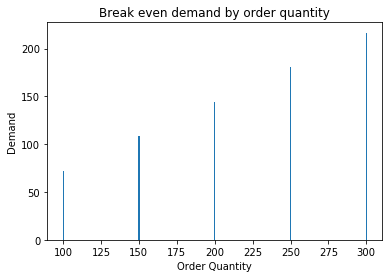

In [11]:
break_even_points = []
for oq in oq_scenarios:
    # Update the model with oq
    book_model.order_quantity = oq
    # Do the goal seek
    break_even = whatif.goal_seek(book_model, 'profit', 0.0, 'demand', 0, 2000)
    break_even_points.append(break_even)
    
print(np.around(break_even_points))

plt.bar(x=oq_scenarios, height=break_even_points)
plt.xlabel("Order Quantity")
plt.ylabel("Demand")
plt.title("Break even demand by order quantity")
plt.show();
    

Since we've made changes to the model object, we might want to reset its values to their initial values.

In [12]:
# See current attribute values
print(book_model)

# Hit the reset button
book_model.update(base_inputs)

# See current attribute values
print(book_model)

{'unit_cost': 7.5, 'selling_price': 10.0, 'unit_refund': 2.5, 'order_quantity': 300, 'demand': 193}
{'unit_cost': 7.5, 'selling_price': 10.0, 'unit_refund': 2.5, 'order_quantity': 200, 'demand': 193}


### Create a data table

Let's do a quick 1-way data table using the order quantities as our input variable.

In [13]:
scenario_inputs = {'order_quantity': oq_scenarios}
outputs = ['profit', 'total_revenue']

dt1_df = whatif.data_table(book_model, scenario_inputs, outputs)
dt1_df

,order_quantity,profit,total_revenue
0,100,250.0,1000.0
1,150,375.0,1500.0
2,200,437.0,1937.0
3,250,112.0,1987.0
4,300,-213.0,2037.0


### Run a simulation

Let's assume we model demand with a normal distribution with a mean of 193 and a standard deviation of 40. First we need to create a random number generator from `numpy.random`.

In [14]:
from numpy.random import default_rng
rg = default_rng(19)

In [15]:
demand_mean = 193
demand_sd = 40

n_reps = 1000

demand_sim = np.around(rg.normal(demand_mean, demand_sd, n_reps))

random_inputs = {'demand': demand_sim}

In [16]:
sim_results = whatif.simulate(book_model, random_inputs, outputs, scenario_inputs)
sim_results_df = whatif.get_sim_results_df(sim_results)
sim_results_df

,profit,total_revenue,scenario_num,order_quantity
0,250.0,1000.0,0,100
1,250.0,1000.0,0,100
2,250.0,1000.0,0,100
3,250.0,1000.0,0,100
4,250.0,1000.0,0,100
...,...,...,...,...
995,39.0,2289.0,4,300
996,741.0,2991.0,4,300
997,-186.0,2064.0,4,300
998,-312.0,1938.0,4,300


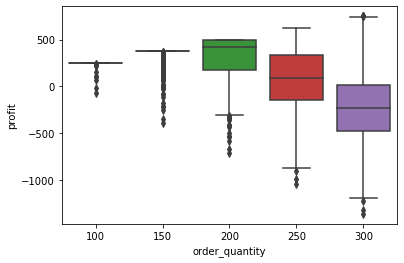

In [17]:
sns.boxplot(x="order_quantity", y="profit", data=sim_results_df);

Plenty of room for enhancements, but not bad. Pretty easy to use.